# Data Science 01: Data Exploration

In [1]:
# install libraries
#%pip install pandas
#%pip install numpy

# import pandas library
import pandas as pd
import numpy as np

In [2]:
# Read clean dataset from file and assign it to variable "df"
other_path = "../../data/raw/clean_timelaps.csv"
df = pd.read_csv(other_path)
df.head()

,id,type_brick,time_start,time_verif,time_dest,time_end,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time
0,1,CORNER,13:52:18,13:52:24,13:52:42,13:52:58,49938,49944,49962,49978,2,6,18,16,40
1,2,HALF,13:52:58,13:53:02,13:53:18,13:53:36,49978,49982,49998,50016,3,4,16,18,38
2,3,BASIC,13:53:36,13:55:20,13:55:44,13:56:00,50016,50120,50144,50160,1,104,24,16,144
3,4,BASIC,13:56:00,13:56:06,13:56:20,13:56:36,50160,50166,50180,50196,1,6,14,16,36
4,5,BASIC,13:56:36,13:56:40,13:56:54,13:58:10,50196,50200,50214,50290,1,4,14,76,94


<h2 id="basic_insight">Insight of Dataset</h2>
<p>
After reading data into Pandas dataframe, it is time to explore the dataset.<br>

There are several ways to obtain essential insights of the data to help us better understand our dataset.
</p>

<h3>Data Types</h3>
<p>
Data has a variety of types.<br>

The main types stored in Pandas dataframes are <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> and <b>datetime64</b>. In order to better learn about each attribute, it is always good for us to know the data type of each column. In Pandas:
</p>


In [3]:
df.dtypes

id                int64
type_brick          str
time_start          str
time_verif          str
time_dest           str
time_end            str
time_start_sec    int64
time_verif_sec    int64
time_dest_sec     int64
time_end_sec      int64
type              int64
start_to_verif    int64
verif_to_dest     int64
dest_to_end       int64
total_time        int64
dtype: object

<p>
As shown above, it is clear to see that the data type of "total_time" are <code>int64</code>, "type_brick" is <code>object</code> etc.
</p>

<h3>Describe</h3>

If we would like to get a statistical summary of each column e.g. count, column mean value, column standard deviation, etc., we use the describe method:

This method will provide various summary statistics, excluding <code>NaN</code> (Not a Number) values.


In [4]:
df.describe()

,id,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time
count,20.00000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000
mean,10.50000,50468.50000,50480.600000,50496.700000,50524.600000,1.15000,12.100000,16.10000,27.900000,56.100000
std,5.91608,310.92045,305.990093,308.305573,311.385427,0.48936,21.749531,10.37152,18.404519,27.920753
min,1.00000,49938.00000,49944.000000,49962.000000,49978.000000,1.00000,4.000000,8.00000,8.000000,32.000000
25%,5.75000,50266.50000,50272.000000,50286.000000,50317.000000,1.00000,6.000000,12.00000,14.000000,35.500000
50%,10.50000,50495.00000,50501.000000,50514.000000,50528.000000,1.00000,7.000000,14.00000,17.000000,45.000000
75%,15.25000,50674.00000,50681.000000,50692.000000,50738.000000,1.00000,10.000000,14.50000,40.000000,69.500000
max,20.00000,50984.00000,50994.000000,51052.000000,51060.000000,3.00000,104.000000,58.00000,76.000000,144.000000


<p>
This shows the statistical summary of all numeric-typed (int, float) columns.</p>

<h3>Info about Dataset</h3>

Another method provides a concise summary of your DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [5]:
# look at the info of "df"
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              20 non-null     int64
 1   type_brick      20 non-null     str  
 2   time_start      20 non-null     str  
 3   time_verif      20 non-null     str  
 4   time_dest       20 non-null     str  
 5   time_end        20 non-null     str  
 6   time_start_sec  20 non-null     int64
 7   time_verif_sec  20 non-null     int64
 8   time_dest_sec   20 non-null     int64
 9   time_end_sec    20 non-null     int64
 10  type            20 non-null     int64
 11  start_to_verif  20 non-null     int64
 12  verif_to_dest   20 non-null     int64
 13  dest_to_end     20 non-null     int64
 14  total_time      20 non-null     int64
dtypes: int64(10), str(5)
memory usage: 2.5 KB


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<h3 id="data_normalization">Data Normalization</h3>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<h3 id="binning">Binning</h3>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

Let's plot the histogram of 'total_time' to see what the distribution of time looks like.

In [6]:
# %pip install matplotlib
# import libraries for plot
import matplotlib.pylab as plt

Text(0.5, 1.0, 'total_time bins')

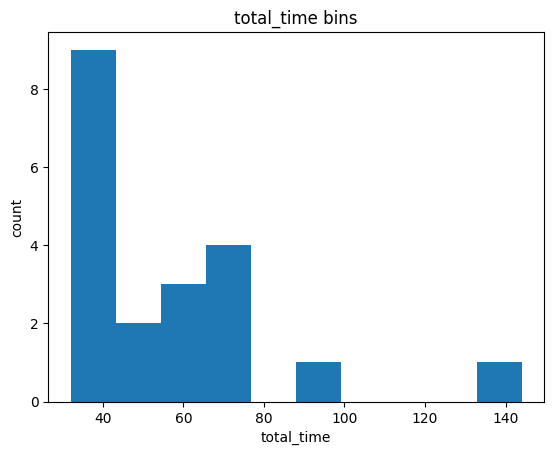

In [7]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["total_time"])

# set x/y labels and plot title
plt.pyplot.xlabel("total_time")
plt.pyplot.ylabel("count")
plt.pyplot.title("total_time bins")

<p>We would like 7 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of total_time, we want to set start_value = min(df["total_time"]).</p>
<p>Since we want to include the maximum value of total_time, we want to set end_value = max(df["total_time"]).</p>
<p>Since we are building 7 bins of equal length, there should be 8 dividers, so numbers_generated = 8.</p>

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [8]:
bins = np.linspace(min(df["total_time"]), max(df["total_time"]), 8)
bins

array([ 32.,  48.,  64.,  80.,  96., 112., 128., 144.])

 We set group  names:

In [9]:
group_names = ['Extremely short','Very short','Short', 'Normal', 'Long','Very long','Extremely long']

 We apply the function "cut" to determine what each value of `df['total_time']` belongs to.

In [10]:
df['total_time_binned'] = pd.cut(df['total_time'], bins, labels=group_names, include_lowest=True )
df[['total_time','total_time_binned']].head(20)

,total_time,total_time_binned
0,40,Extremely short
1,38,Extremely short
2,144,Extremely long
3,36,Extremely short
4,94,Normal
5,36,Extremely short
6,32,Extremely short
7,76,Short
8,44,Extremely short
9,34,Extremely short


Let's see the number of vehicles in each bin:

In [11]:
df["total_time"].value_counts()

total_time
34     3
36     2
32     2
76     2
64     2
40     1
38     1
144    1
94     1
44     1
46     1
74     1
68     1
56     1
Name: count, dtype: int64

Let's plot the distribution of each bin:

Text(0.5, 1.0, 'total_time bins')

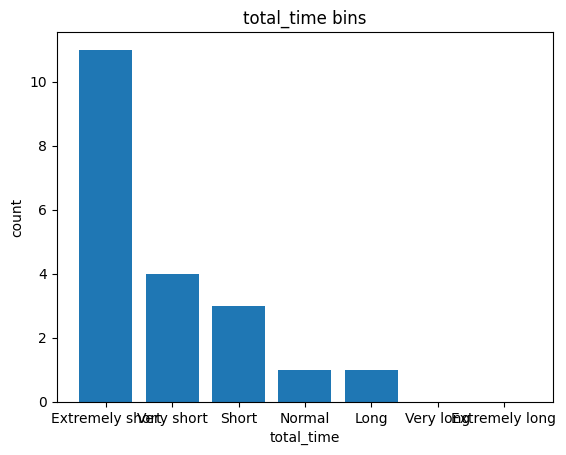

In [12]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["total_time_binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("total_time")
plt.pyplot.ylabel("count")
plt.pyplot.title("total_time bins")

<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'total_time bins')

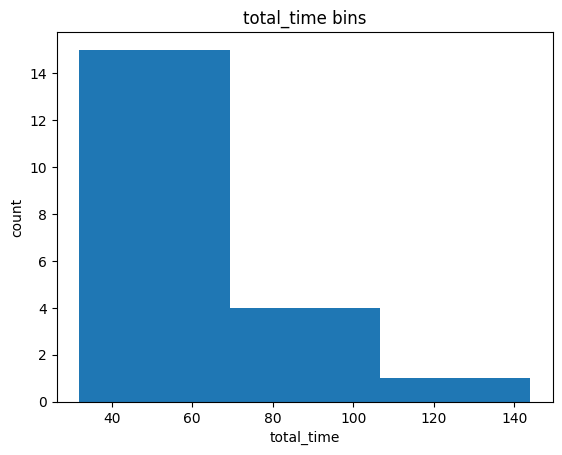

In [13]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "total_time" with bins = 3
plt.pyplot.hist(df["total_time"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("total_time")
plt.pyplot.ylabel("count")
plt.pyplot.title("total_time bins")

The plot above shows the binning result for the attribute "total_time".

<h2 id="indicator">Indicator Variable</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>

In [14]:
df.columns

Index(['id', 'type_brick', 'time_start', 'time_verif', 'time_dest', 'time_end',
       'time_start_sec', 'time_verif_sec', 'time_dest_sec', 'time_end_sec',
       'type', 'start_to_verif', 'verif_to_dest', 'dest_to_end', 'total_time',
       'total_time_binned'],
      dtype='str')

Get the indicator variables and assign it to data frame "dummy_variable_1":


In [15]:
dummy_variable_1 = pd.get_dummies(df["type_brick"])
dummy_variable_1.head()

,BASIC,CORNER,HALF
0,False,True,False
1,False,False,True
2,True,False,False
3,True,False,False
4,True,False,False


Change the column names for clarity:

In [16]:
dummy_variable_1.rename(columns={'BASIC':'brick_basic', 'CORNER':'brick_corner', 'HALF':'brick_half'}, inplace=True)
dummy_variable_1.head()

,brick_basic,brick_corner,brick_half
0,False,True,False
1,False,False,True
2,True,False,False
3,True,False,False
4,True,False,False


In [17]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "type_brick" from "df"
# df.drop("type_brick", axis = 1, inplace=True)

In [18]:
df.head()

,id,type_brick,time_start,time_verif,time_dest,time_end,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_binned,brick_basic,brick_corner,brick_half
0,1,CORNER,13:52:18,13:52:24,13:52:42,13:52:58,49938,49944,49962,49978,2,6,18,16,40,Extremely short,False,True,False
1,2,HALF,13:52:58,13:53:02,13:53:18,13:53:36,49978,49982,49998,50016,3,4,16,18,38,Extremely short,False,False,True
2,3,BASIC,13:53:36,13:55:20,13:55:44,13:56:00,50016,50120,50144,50160,1,104,24,16,144,Extremely long,True,False,False
3,4,BASIC,13:56:00,13:56:06,13:56:20,13:56:36,50160,50166,50180,50196,1,6,14,16,36,Extremely short,True,False,False
4,5,BASIC,13:56:36,13:56:40,13:56:54,13:58:10,50196,50200,50214,50290,1,4,14,76,94,Normal,True,False,False


The last three columns are now the indicator variable representation of the brick-type variable. They're all 0s and 1s now.

In [19]:
df

,id,type_brick,time_start,time_verif,time_dest,time_end,time_start_sec,time_verif_sec,time_dest_sec,time_end_sec,type,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_binned,brick_basic,brick_corner,brick_half
0,1,CORNER,13:52:18,13:52:24,13:52:42,13:52:58,49938,49944,49962,49978,2,6,18,16,40,Extremely short,False,True,False
1,2,HALF,13:52:58,13:53:02,13:53:18,13:53:36,49978,49982,49998,50016,3,4,16,18,38,Extremely short,False,False,True
2,3,BASIC,13:53:36,13:55:20,13:55:44,13:56:00,50016,50120,50144,50160,1,104,24,16,144,Extremely long,True,False,False
3,4,BASIC,13:56:00,13:56:06,13:56:20,13:56:36,50160,50166,50180,50196,1,6,14,16,36,Extremely short,True,False,False
4,5,BASIC,13:56:36,13:56:40,13:56:54,13:58:10,50196,50200,50214,50290,1,4,14,76,94,Normal,True,False,False
5,6,BASIC,13:58:10,13:58:16,13:58:30,13:58:46,50290,50296,50310,50326,1,6,14,16,36,Extremely short,True,False,False
6,7,BASIC,13:58:46,13:58:50,13:59:04,13:59:18,50326,50330,50344,50358,1,4,14,14,32,Extremely short,True,False,False
7,8,BASIC,13:59:18,13:59:24,13:59:38,14:00:34,50358,50364,50378,50434,1,6,14,56,76,Short,True,False,False
8,9,BASIC,14:00:34,14:00:42,14:00:54,14:01:18,50434,50442,50454,50478,1,8,12,24,44,Extremely short,True,False,False
9,10,BASIC,14:01:18,14:01:24,14:01:38,14:01:52,50478,50484,50498,50512,1,6,14,14,34,Extremely short,True,False,False


Save the new csv:


In [20]:
df.to_csv('../../data/raw/exploration_timelaps.csv', index=False)

#### Author/Date/Organization

Vjaceslav Usmanov, CTU in Prague

###### Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2026-01-20 | 1.1 | Vjaceslav Usmanov| added DS_02_Exploration.ipynb |
| 2026-02-11 | 1.2 | Vjaceslav Usmanov| changed DS_02_Exploration.ipynb |